In [1]:
from PIL import Image, ImageFilter, ImageEnhance
import numpy as np
from pathlib import Path
import random
import plotly.express as px
from scipy import ndimage
import math
from tqdm.auto import tqdm
import pandas as pd

In [2]:
import sys
sys.path.append('../../30_data_tools/')

from helper import load_dotenv

In [3]:
dotenv = load_dotenv()

In [4]:
tile_dataset = Path('../Model/dataset/train')

In [5]:
moire_images = list( (tile_dataset / 'moire').glob('./*.jpg') )

In [77]:
def get_fft( input_img ):
    ft = np.fft.ifftshift(np.array(input_img)[:,:,0])
    ft = np.fft.fft2(ft)
    ft = np.fft.fftshift(ft)
    
    return ft

def invert_fft (input_real, input_imaginary):
    input = (input_real + 1j * input_imaginary)
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

In [7]:
def get_spherical_coordinate( x, y ):
    r = math.sqrt( x ** 2 + y ** 2 )
    angle = math.degrees(math.atan2(y,x))

    return r, angle

In [8]:
def get_carthesian_coordinate( r, angle ):
    x = r * math.cos(math.radians(angle))
    y = r * math.sin(math.radians(angle))
    return x, y

In [9]:
def limit_frequencies( fft, inner_limit=None, outer_limit=None ):
    center = (fft.shape[1] / 2, fft.shape[0] / 2)
    for y in range(fft.shape[0]):
        for x in range(fft.shape[1]):
            r = math.sqrt( abs(center[0] - x) ** 2 + abs(center[1] - y) ** 2 )
            
            if outer_limit is not None and r > outer_limit:
                fft[y,x] = 0
    
            if inner_limit is not None and r < inner_limit:
                fft[y,x] = 0

    return fft

In [ ]:
moire_path = random.choices(moire_images, k=1)[0]
non_moire_path = tile_dataset / 'no_moire' / moire_path.name

moire_img = Image.open( moire_path )
no_moire_img = Image.open( non_moire_path )

diff_img = Image.fromarray(np.array(moire_img) - np.array(no_moire_img))
diff_img = diff_img.filter(ImageFilter.BoxBlur(2))
enhancer = ImageEnhance.Contrast(diff_img)
diff_img = enhancer.enhance(2)


fft = get_fft(diff_img)
fft = limit_frequencies( fft, inner_limit=10, outer_limit=130 )

display_image = Image.new(size=(moire_img.size[0]*3, moire_img.size[1]), mode='L')
display_image.paste(moire_img, (0,0))
display_image.paste(no_moire_img, (moire_img.size[0],0))
display_image.paste(diff_img, (moire_img.size[0]*2,0))

display_image

In [ ]:
1/55 * 240

In [ ]:
600 / 150

In [ ]:
real_moire_dataset = Path('../Model/dataset/real_val/moire/')
real_moire_paths = list( real_moire_dataset.glob('./*.jpg') )

In [ ]:
real_moire_img = real_moire_paths[2]
moire_img = Image.open(real_moire_img)

moire_img

In [ ]:
fft_moire = limit_frequencies( get_fft(moire_img), inner_limit=10, outer_limit=130 )

px.imshow( ndimage.uniform_filter( np.abs(fft_moire) , size=5 )[65:215,65:215], zmax = 30000 )

In [ ]:
1/74 * 240

In [19]:
example_tile_path = Path('/Users/frederic.birwe/Downloads/testkachel.jpg')
no_moire_img = Image.open(example_tile_path)


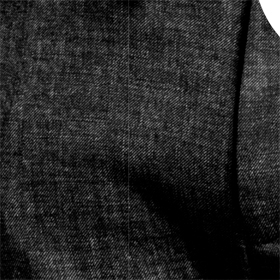

In [20]:
no_moire_img

In [78]:
fft = get_fft( no_moire_img )

In [151]:
inverted_fft = invert_fft(
    real_moire,
    imag_moire
).round()

inverted_fft[inverted_fft < 0] = 0
inverted_fft[inverted_fft > 255] = 255

Image.fromarray(
    inverted_fft.astype('uint8')
).save('/Users/frederic.birwe/Downloads/neue_kachel.jpg')

In [137]:
inverted_fft[
    135:145,
    135:145
]

array([[ 48.,  30.,  30.,  41.,  45.,  50.,  25.,  38.,  45.,  30.],
       [ 54.,  31.,  16.,  72.,  23.,  36.,  58.,  17.,  30.,  36.],
       [ 78.,  60.,  66.,  12.,  53., 137.,  20.,  33.,  75.,  42.],
       [ 71.,  52.,   0.,  39., 209.,   3.,   0., 143.,   0.,  17.],
       [ 45.,  25.,  23., 176.,   0.,   6., 218.,   1.,   8.,  74.],
       [ 75.,  70., 166.,   0.,   0., 241.,   2.,   0., 129.,  43.],
       [ 75.,  63.,  14.,  32., 230.,   0.,   0., 199.,   6.,  16.],
       [ 63.,  31.,  16., 147.,   7.,   0., 170.,  52.,  21.,  70.],
       [ 80.,  58., 103.,   4.,   0., 145.,  61.,  16.,  89.,  72.],
       [ 63.,  58.,  69.,  40.,  88.,  56.,  35.,  83.,  43.,  43.]])

In [132]:
inverted_fft.max(), inverted_fft.min()

(262.0, -14.0)

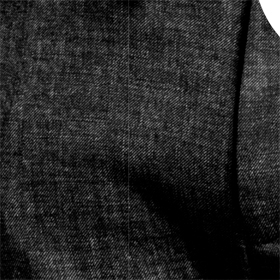

In [150]:
no_moire_img

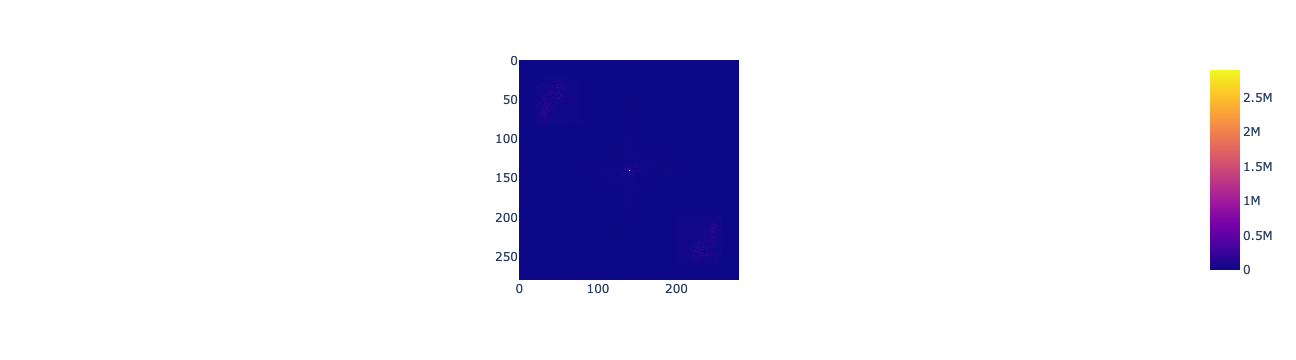

In [149]:
px.imshow(
    np.abs(real_moire)
)

In [163]:
1 / 127.27922061357856 * 280

2.1998877636914815

In [158]:
math.sqrt( 90 ** 2 * 2 )

127.27922061357856

In [156]:
fft_moire = get_fft(no_moire_img)
real_moire = fft_moire.real
imag_moire = fft_moire.imag

adjust_value = 2500 / fft_moire[
    20:80,
    20:80
].mean()

fft_moire[
    20:80,
    20:80
] = fft_moire[
    20:80,
    20:80
] * adjust_value

adjust_value = 2500 / fft_moire[
    200:260,
    200:260
].mean().abs()

print( adjust_value.real )

fft_moire[
    200:260,
    200:260
] = fft_moire[
    200:260,
    200:260
] * adjust_value

px.imshow( ndimage.uniform_filter( np.abs(limit_frequencies( real_moire.copy(), inner_limit=10 )) , size=5), zmax = 30000 )

AttributeError: 'numpy.complex128' object has no attribute 'abs'

In [ ]:
px.imshow( ndimage.uniform_filter( np.abs(fft) , size=5) )

In [ ]:
filtered = ndimage.uniform_filter( np.abs(fft) , size=5)[85:195,85:195]
#filtered = filtered ** 2
filtered[filtered < filtered.max() * 0.6] = 0
filtered = ndimage.uniform_filter( np.abs(filtered) , size=5)

px.imshow( filtered )

In [ ]:
rundung = ndimage.uniform_filter( np.abs(fft) , size=5)[85:195,85:195]

In [ ]:
vorschub_linie = ndimage.uniform_filter( np.abs(fft) , size=5)[85:195,85:195]

In [ ]:
linie_normal2 = ndimage.uniform_filter( np.abs(fft) , size=5)[85:195,85:195]

In [ ]:
linie_normal = ndimage.uniform_filter( np.abs(fft) , size=5)[85:195,85:195]

In [ ]:
karree = ndimage.uniform_filter( np.abs(fft) , size=5)[85:195,85:195]

In [ ]:
px.imshow(karree)

In [ ]:
-127.0730733173104

In [ ]:
50 - 140 , 72 - 140

In [ ]:
filtered.shape

In [ ]:
1

In [ ]:
r, angle = get_main_impulse( filtered )

r, 1/r * 280, angle

In [ ]:
moire_img.save('/Users/frederic.birwe/Downloads/sample.jpg')

In [ ]:
def get_main_impulse( fft ):
    filtered = ndimage.uniform_filter( np.abs(fft) , size=5)
    pos = np.unravel_index(np.argmax(filtered, axis=None), filtered.shape)
    x = pos[1] - fft.shape[1] / 2
    y = pos[0] - fft.shape[0] / 2
    
    r, angle = get_spherical_coordinate(x,y)

    return r, angle

In [ ]:
selected_moires = random.choices(moire_images, k=1000)
rows = []

for moire_path in tqdm(selected_moires):
    non_moire_path = tile_dataset / 'no_moire' / moire_path.name
    
    moire_img = Image.open( moire_path )
    no_moire_img = Image.open( non_moire_path )
    
    diff_img = Image.fromarray(np.array(moire_img) - np.array(no_moire_img))
    
    fft = get_fft(diff_img.filter(ImageFilter.BoxBlur(2)))
    fft[138:142,138:142] = 0

    r, angle = get_main_impulse( fft )
    angle = angle + 90
    T = 1 / r * 280
    
    rows.append((
        moire_path.name,
        T,
        angle
    ))

data = pd.DataFrame(
    rows,
    columns=[
        'img_name',
        'pattern_period',
        'angle'
    ]
)

In [ ]:
data

In [ ]:
selected_images = data.loc[
    data.pattern_period == 70
]

In [ ]:
row = moire_images.iloc[6]

print( row.pattern_period, row.angle )
Image.open( tile_dataset / 'moire' / row.img_name )

In [ ]:
import cv2
from sklearn.cluster import KMeans

In [ ]:
dot

In [ ]:
moire_img

In [ ]:
X = []

for moire_path in tqdm(selected_moires):
    non_moire_path = tile_dataset / 'no_moire' / moire_path.name
    
    moire_img = Image.open( moire_path )
    no_moire_img = Image.open( non_moire_path )
    
    diff_img = Image.fromarray(np.array(moire_img) - np.array(no_moire_img))
    diff_img = diff_img.filter(ImageFilter.BoxBlur(2))
    enhancer = ImageEnhance.Contrast(diff_img)
    diff_img = enhancer.enhance(2)
    
    fft = get_fft(diff_img.filter(ImageFilter.BoxBlur(2)))
    fft = limit_frequencies( fft, inner_limit=10, outer_limit=130 )

    filtered = ndimage.uniform_filter( np.abs(fft) , size=5)[85:195,85:195]
    #filtered = filtered ** 2
    filtered[filtered < filtered.max() * 0.6] = 0
    filtered = ndimage.uniform_filter( np.abs(filtered) , size=5)
                
    resized = cv2.resize(
        filtered,
        (50,50)
    )
    resized /= resized.max()

    X.append(resized)

In [ ]:
X_train = np.array([entry.reshape((50*50,)) for entry in X])

In [ ]:
def display_image_grid( images, img_size=(280,280) ):
    cols = 5
    rows = math.ceil( len(images) / cols )
    
    display_image = Image.new(
        size=(img_size[0]*cols,img_size[1]*rows),
        mode='RGB'
    )
    
    for i in range(len(images)):
        row = math.floor(i / cols)
        col = i % cols

        display_image.paste(
            Image.open(images[i]),
            (col*img_size[0],row*img_size[1])
        )

    return display_image

# Silhouette Analysis

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
for n_clusters in range(2,10):

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(X_train)
    cluster_labels = clusterer.fit_predict(X_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(X_train)

In [ ]:
display_image_grid( [selected_moires[i] for i in range(len(selected_moires)) if kmeans.labels_[i] == 2][:50] )

In [ ]:
moire_path = random.choice(moire_images)
non_moire_path = tile_dataset / 'no_moire' / moire_path.name

moire_img = Image.open( moire_path )
no_moire_img = Image.open( non_moire_path )

diff_img = Image.fromarray(np.array(moire_img) - np.array(no_moire_img))

fft = get_fft(diff_img.filter(ImageFilter.BoxBlur(2)))
fft = limit_frequencies( fft, inner_limit=10, outer_limit=130 )

r, angle = get_main_impulse( fft )
angle = angle + 90
T = 1 / r * 280

print(T, angle)

px.imshow(ndimage.uniform_filter( np.abs(fft) , size=5))

In [ ]:
coors = [
    (155,117),
    (123,145),
    (137,155),
    (129,123),
    (147,113),
    (142,120),
    (128,128),
    (129,145),
    (154,150),
    (150,143),
    (117,138)
]

In [ ]:
for co in coors:
    print( get_spherical_coordinate(140 - co[0],140 - co[1]) )

In [ ]:
moire_img

In [ ]:
moire_path

In [ ]:
diff_img.save('/Users/frederic.birwe/Downloads/test.jpg')